In [ ]:
import pandas as pd 
from pandas_datareader import data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/Consumer_Complaints_Datasets.zip

Archive:  /content/Consumer_Complaints_Datasets.zip
  inflating: Consumer_Complaints_test.csv  
  inflating: Consumer_Complaints_train.csv  


In [ ]:
df_tr = pd.read_csv('/content/Consumer_Complaints_train.csv')
df_te= pd.read_csv('/content/Consumer_Complaints_test.csv')
# df.describe()
df_tr.isnull().sum()/df_tr.shape[0]*100
df_te.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [ ]:
null_percentage = df_tr.isnull().sum()/df_tr.shape[0]*100
col_to_drop = null_percentage[null_percentage>25].keys()
df_tr = df_tr.drop(col_to_drop, axis=1)
df_tr.isnull().sum()/df_tr.shape[0]*100

Date received                   0.000000
Product                         0.000000
Issue                           0.000000
Company                         0.000000
State                           0.809063
ZIP code                        0.811293
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Consumer disputed?              0.000000
Complaint ID                    0.000000
dtype: float64

In [ ]:
df_tr['Year'] = pd.DatetimeIndex(df_tr['Date received']).year
df_tr['Month'] = pd.DatetimeIndex(df_tr['Date received']).month
df_tr['Day'] = pd.DatetimeIndex(df_tr['Date received']).day
df_tr

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,4,14
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,3,14
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,2,1
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,6,25


In [ ]:
df_tr['Date sent to company'] = pd.to_datetime(df_tr['Date sent to company'])
df_tr['Date received'] = pd.to_datetime(df_tr['Date received'])
df_tr['Days held'] = (df_tr['Date sent to company']-df_tr['Date received']).dt.days
df_tr.head(10)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Day,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0
5,2014-01-10,Credit card,APR or interest rate,TD Bank US Holding Company,FL,33180,Web,2014-01-15,Closed with explanation,Yes,Yes,663281,2014,1,10,5
6,2016-02-03,Mortgage,"Loan modification,collection,foreclosure",Ocwen,NJ,071XX,Web,2016-02-03,Closed with explanation,Yes,No,1771444,2016,2,3,0
7,2015-12-07,Credit card,Payoff process,Capital One,IL,60610,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130,2015,12,7,0
8,2012-04-05,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,18337,Web,2012-04-05,Closed with relief,Yes,Yes,44225,2012,4,5,0
9,2015-08-13,Debt collection,Cont'd attempts collect debt not owed,Grant & Weber,CA,91302,Web,2015-08-20,Closed with explanation,Yes,No,1518460,2015,8,13,7


In [ ]:
df_tr = df_tr.drop(df_tr.columns[[7,5,11]], axis=1 )
df_tr.dtypes


Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
Submitted via                           object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Year                                     int64
Month                                    int64
Day                                      int64
Days held                                int64
dtype: object

In [ ]:
df_tr = df_tr.fillna(df_tr['State'].value_counts().index[0])
df_tr.isnull().sum()/df_tr.shape[0]*100

Date received                   0.0
Product                         0.0
Issue                           0.0
Company                         0.0
State                           0.0
Submitted via                   0.0
Company response to consumer    0.0
Timely response?                0.0
Consumer disputed?              0.0
Year                            0.0
Month                           0.0
Day                             0.0
Days held                       0.0
dtype: float64

In [ ]:
df_tr['Week'] = df_tr['Date received'].dt.week
df_tr

<ipython-input-12-182557f7f020>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_tr['Week'] = df_tr['Date received'].dt.week


,Date received,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day,Days held,Week
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0,42
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,17
2,2013-12-20,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14,51
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1,9
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1,16
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4,11
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0,5
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4,26


In [ ]:
df_tr['disputed_cons'] = df_tr['Consumer disputed?']
df_tr['Consumer disputed?'] = np.where(df_tr['Consumer disputed?'] == "No", 0, 1)

<Axes: xlabel='Consumer disputed?', ylabel='count'>

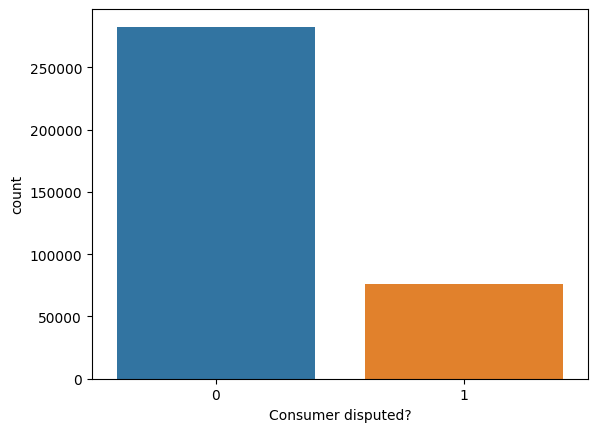

In [ ]:
sns.countplot(x="Consumer disputed?",data=df_tr)

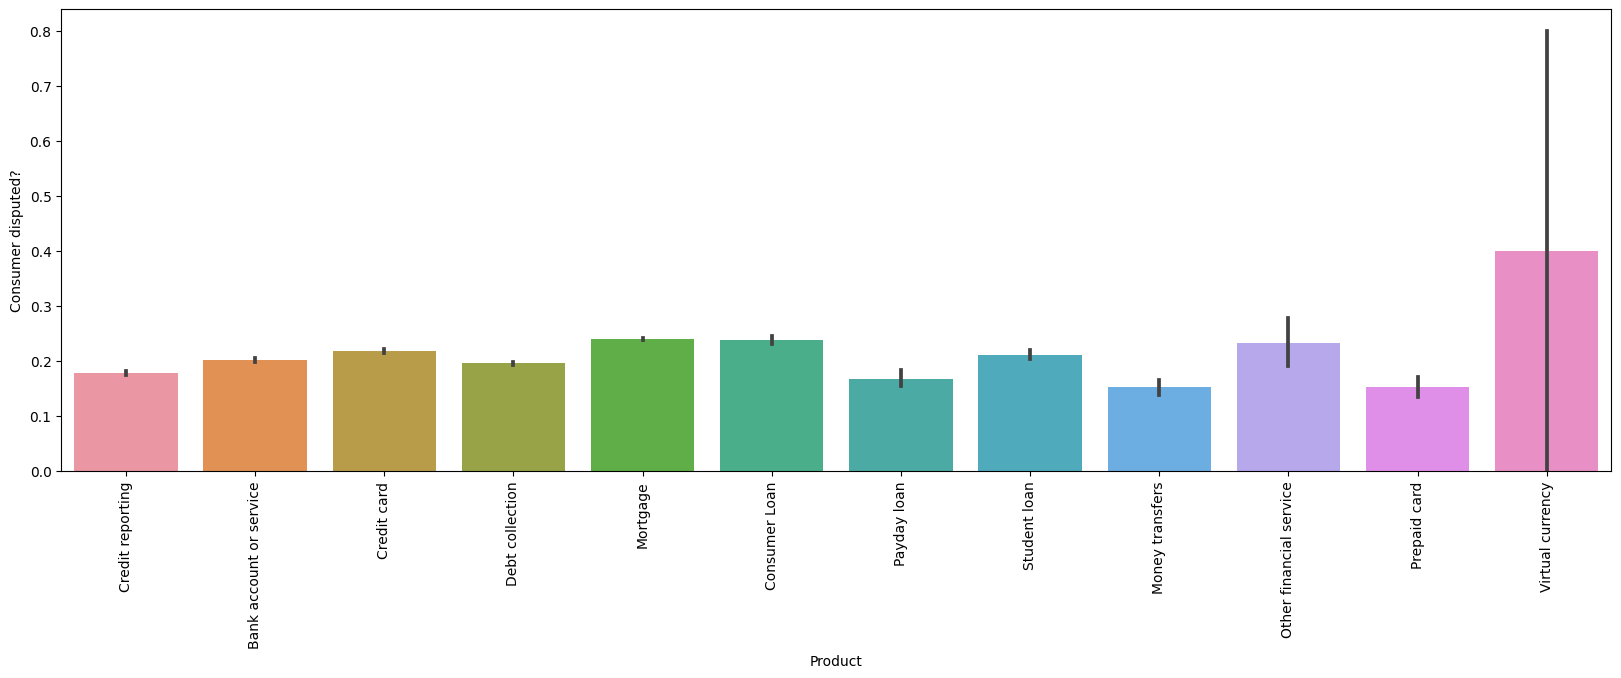

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
ax.tick_params(axis='x', rotation=90)
sns.barplot(y = 'Consumer disputed?',
            x = 'Product',
            data = df_tr)

plt.show()

<Axes: xlabel='Product', ylabel='count'>

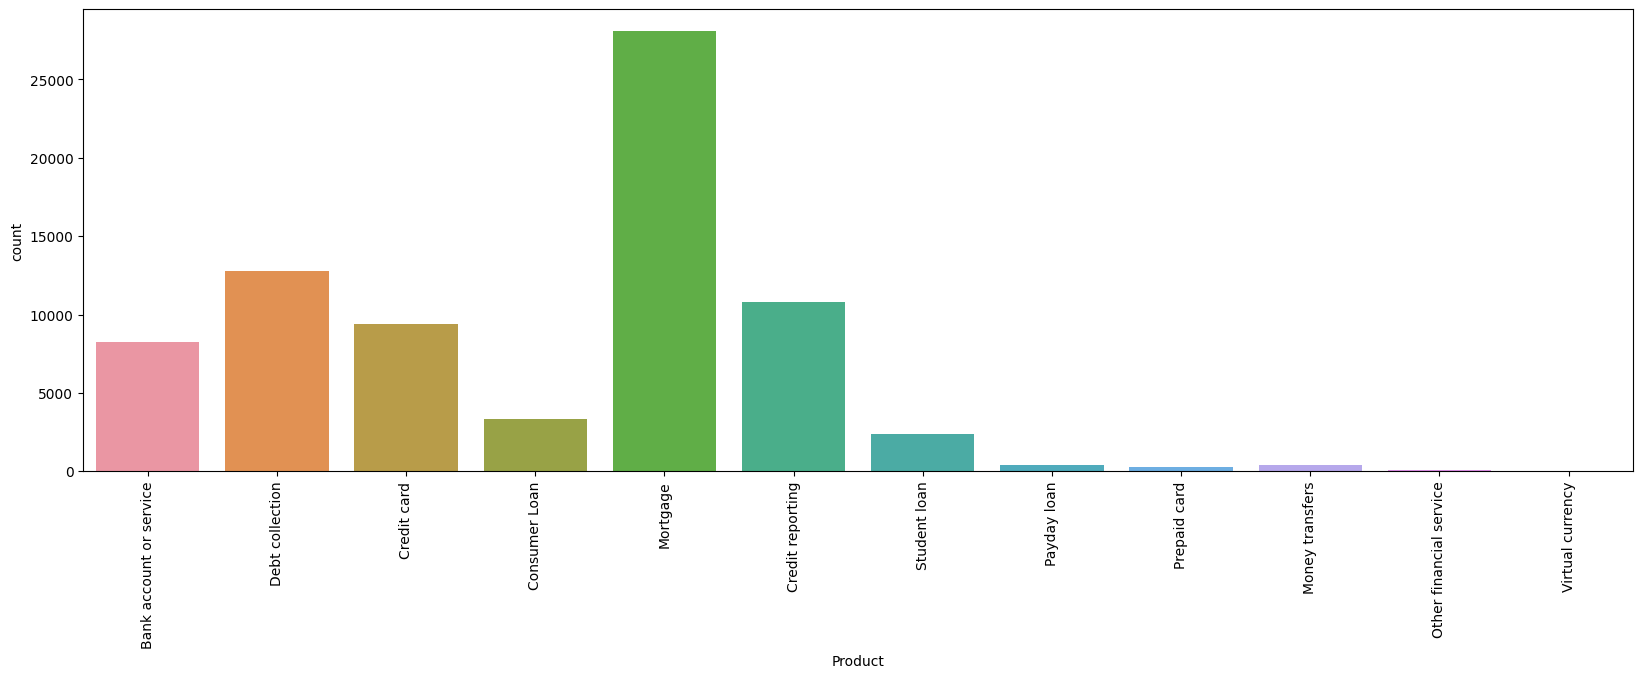

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
ax.tick_params(axis='x', rotation=90)
sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['Product'],data=df_tr)

<Axes: xlabel='Issue', ylabel='Consumer disputed?'>

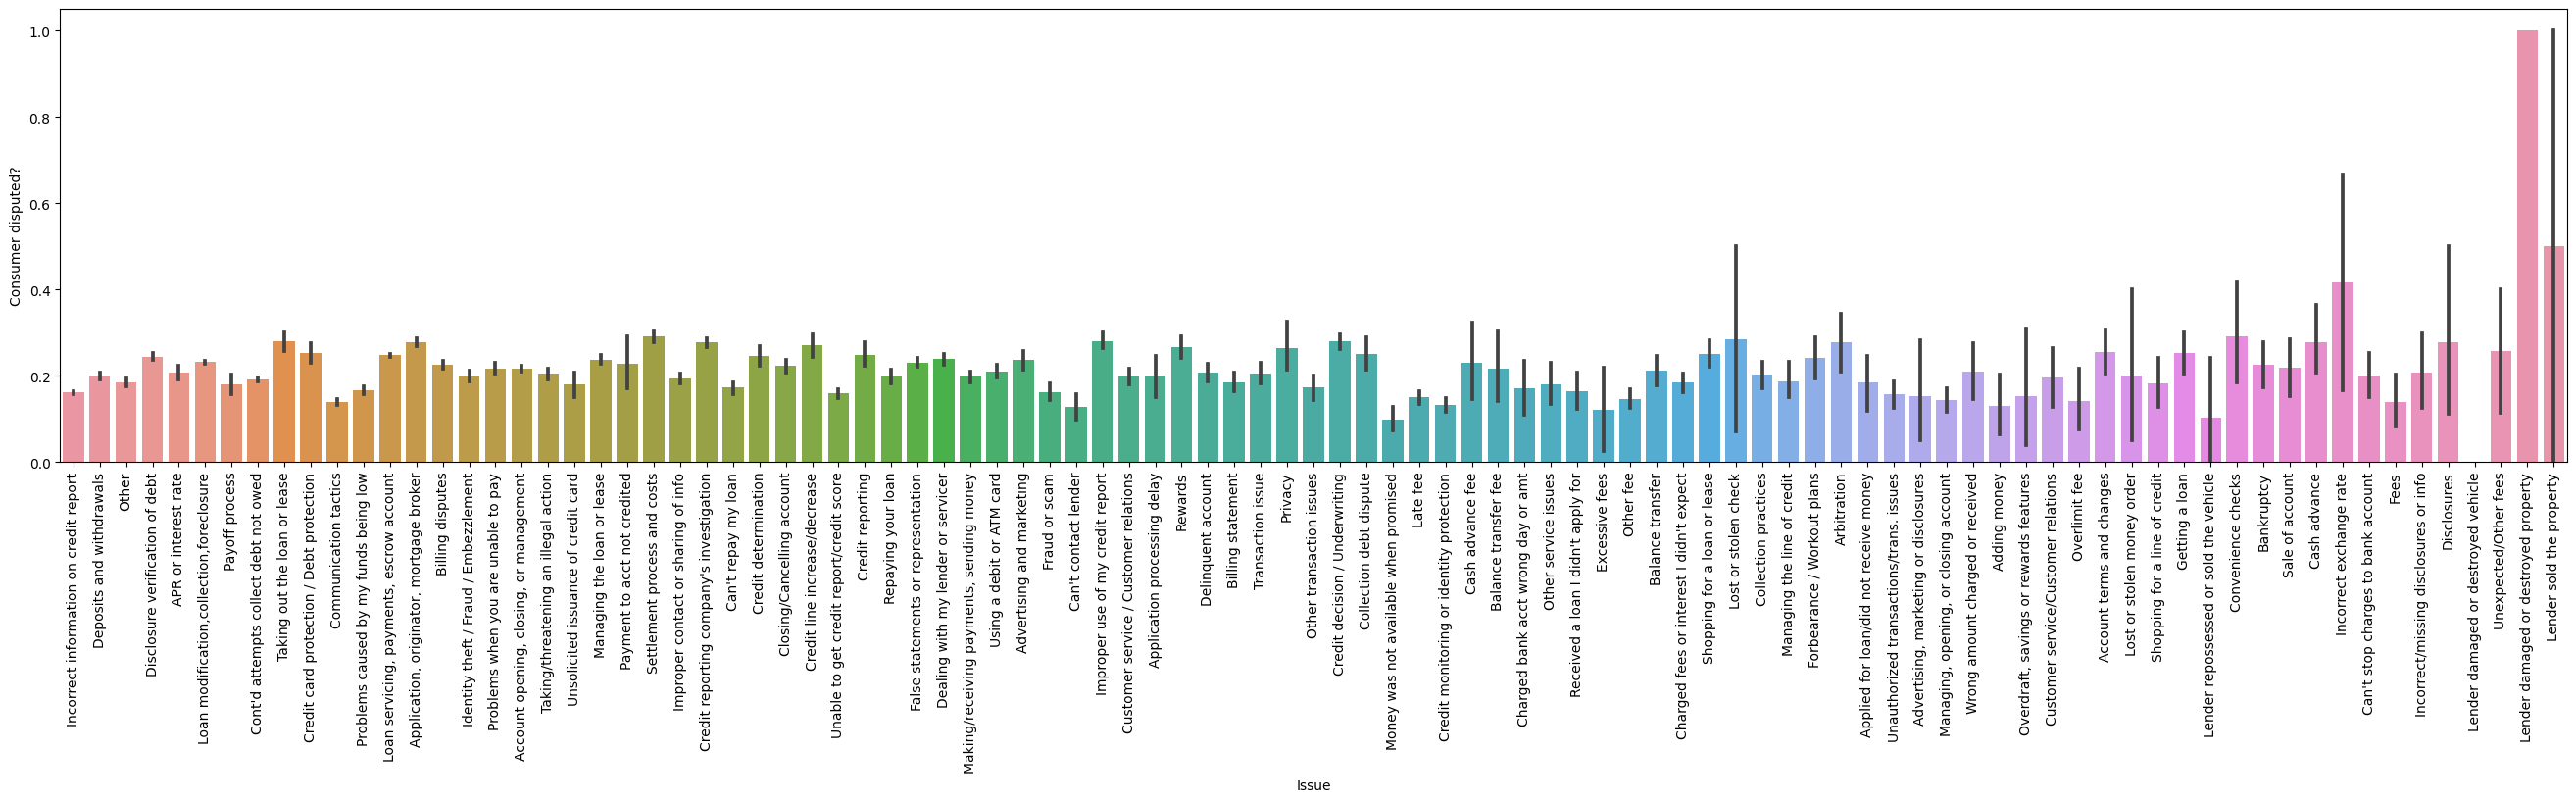

In [ ]:
fig,ax = plt.subplots(figsize=(33,6))
ax.tick_params(axis='x', rotation=90)
sns.barplot(y = 'Consumer disputed?',
            x = 'Issue',
            data = df_tr)

<Axes: xlabel='Issue', ylabel='count'>

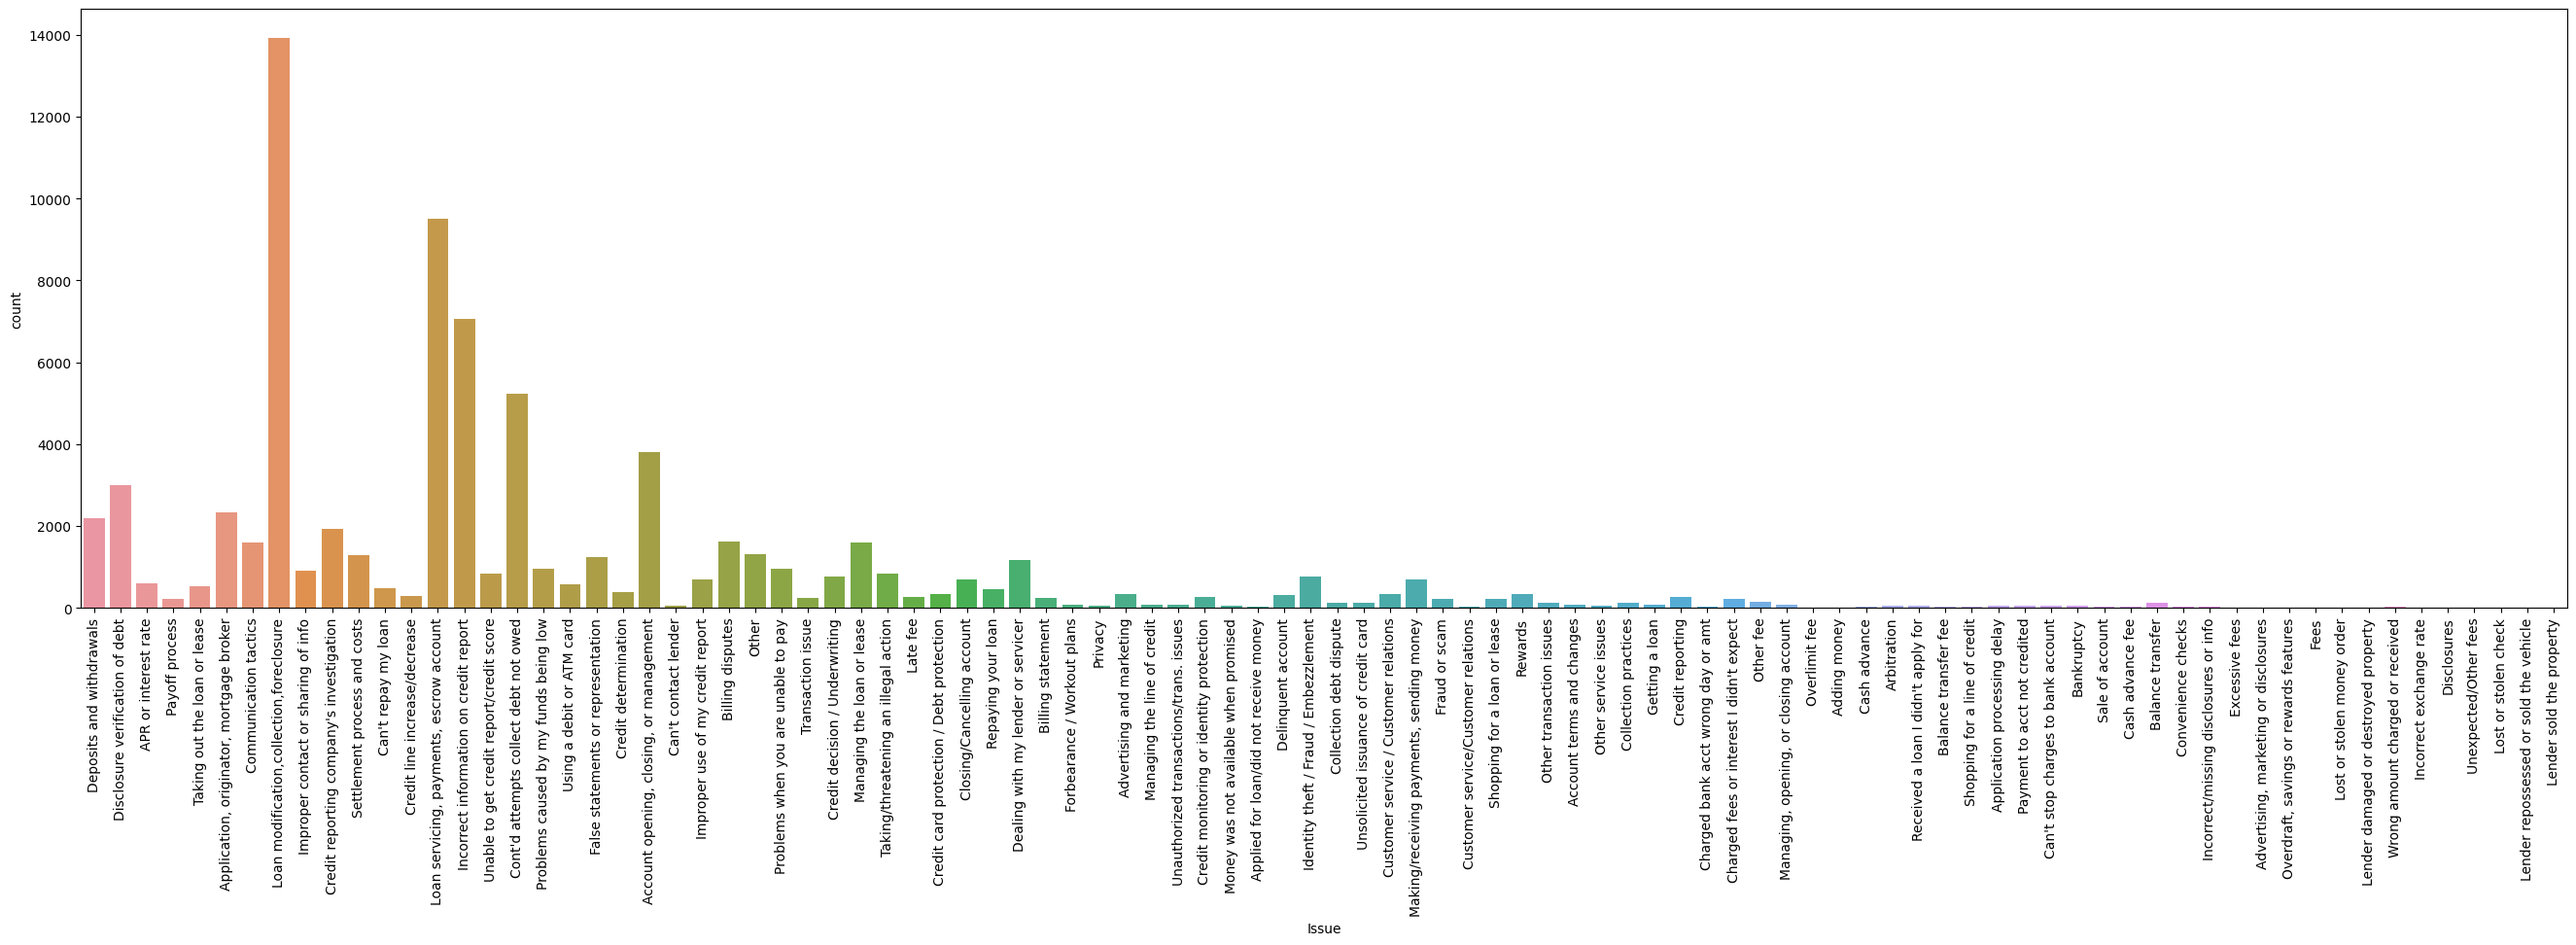

In [ ]:
fig,ax = plt.subplots(figsize=(33,8))
ax.tick_params(axis='x', rotation=90)
sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['Issue'],data=df_tr)

<Axes: xlabel='State', ylabel='Consumer disputed?'>

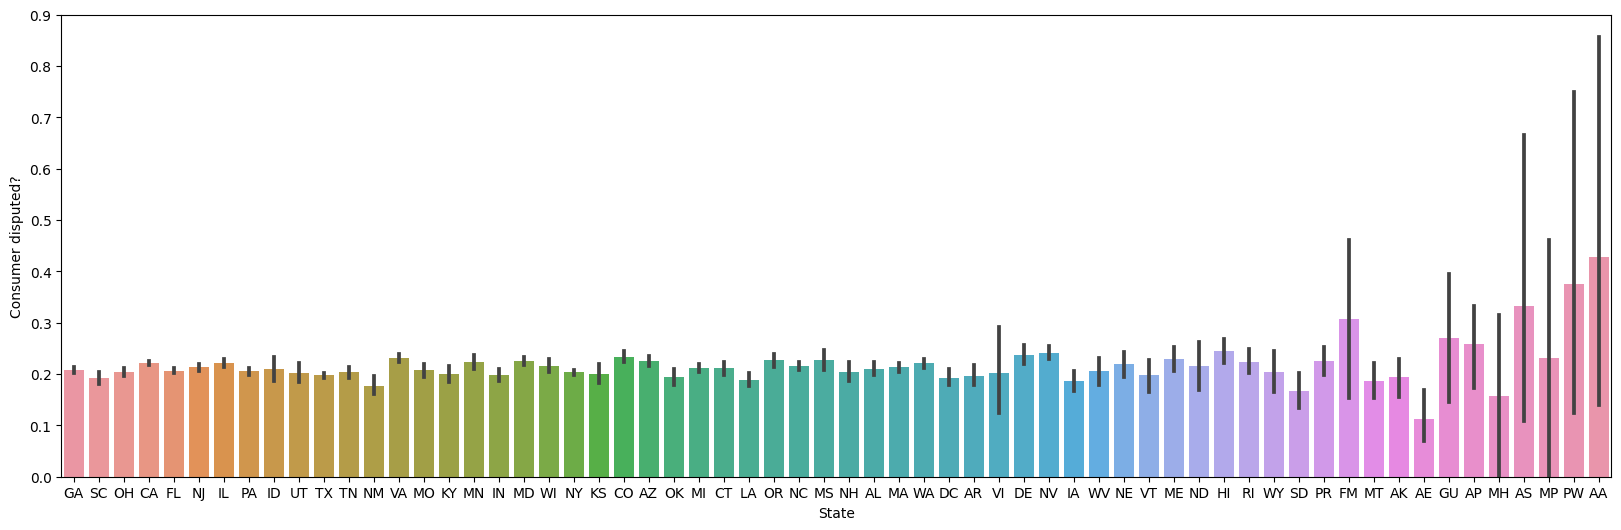

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.barplot(y = 'Consumer disputed?',
            x = 'State',
            data = df_tr)

<Axes: xlabel='State', ylabel='count'>

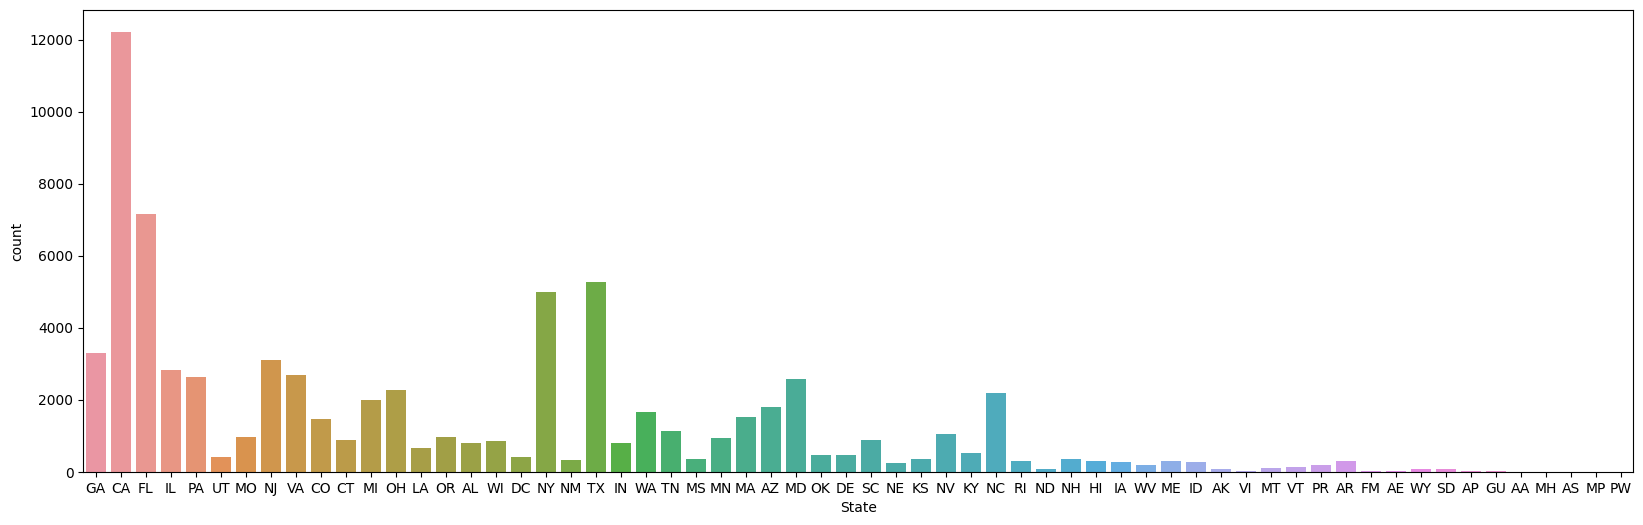

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['State'],data=df_tr)


<Axes: xlabel='Submitted via', ylabel='Consumer disputed?'>

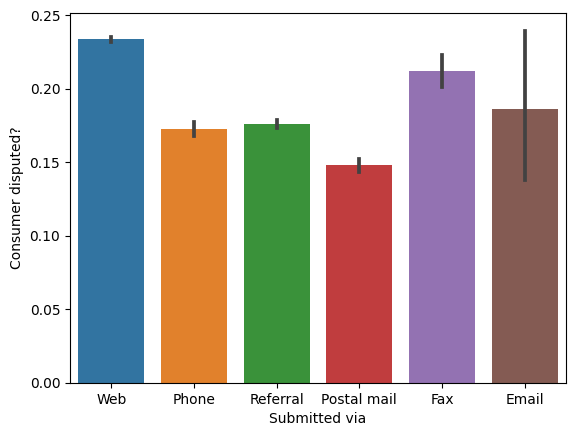

In [ ]:
sns.barplot(x = 'Submitted via',
            y = 'Consumer disputed?',
            data = df_tr)

<Axes: xlabel='Submitted via', ylabel='count'>

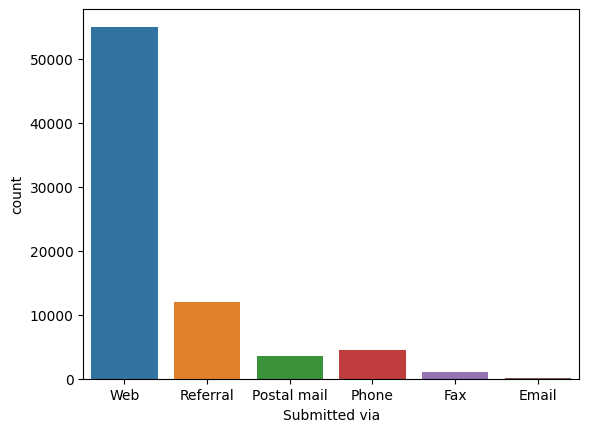

In [ ]:
sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['Submitted via'],data=df_tr)


<Axes: xlabel='Company response to consumer', ylabel='Consumer disputed?'>

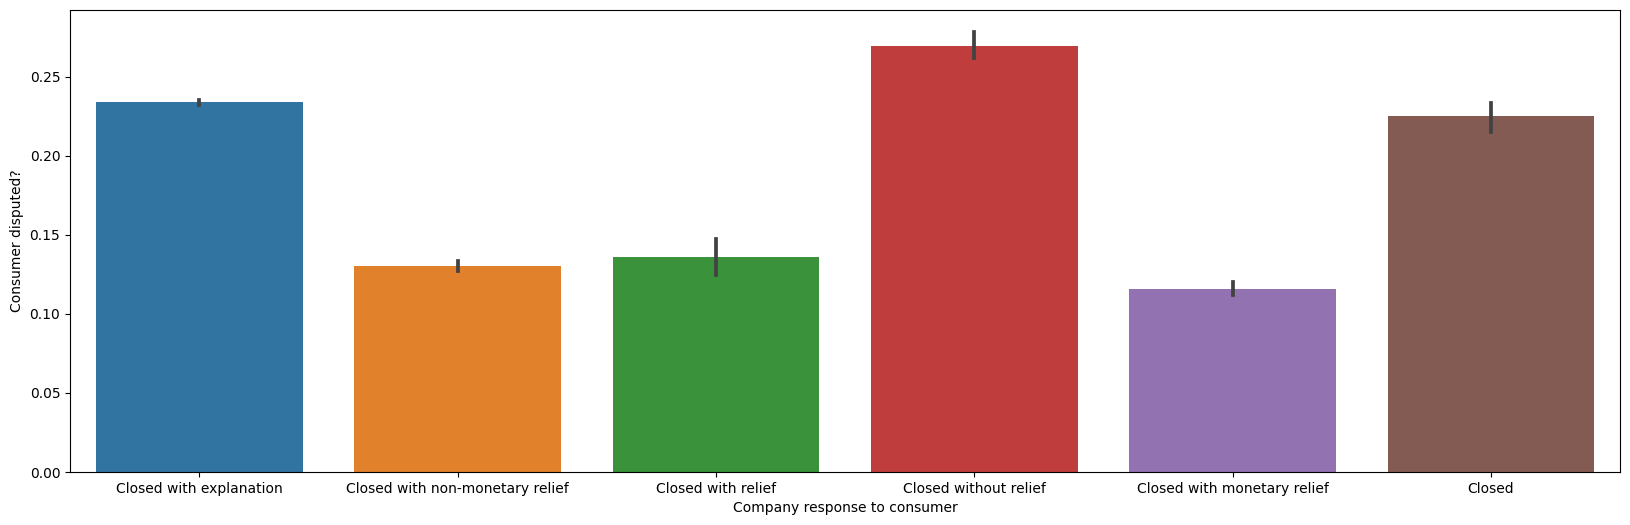

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.barplot(x = 'Company response to consumer',
            y = 'Consumer disputed?',
            data = df_tr)

<Axes: xlabel='Company response to consumer', ylabel='count'>

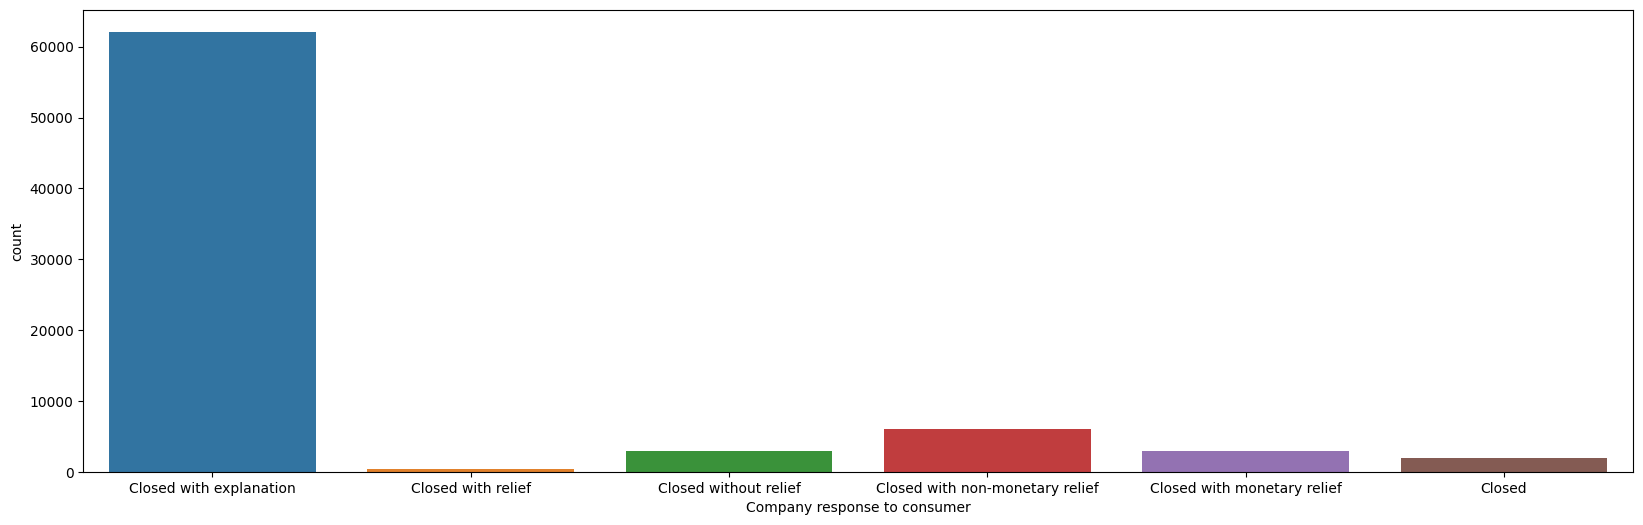

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['Company response to consumer'],data=df_tr)

<Axes: xlabel='Timely response?', ylabel='Consumer disputed?'>

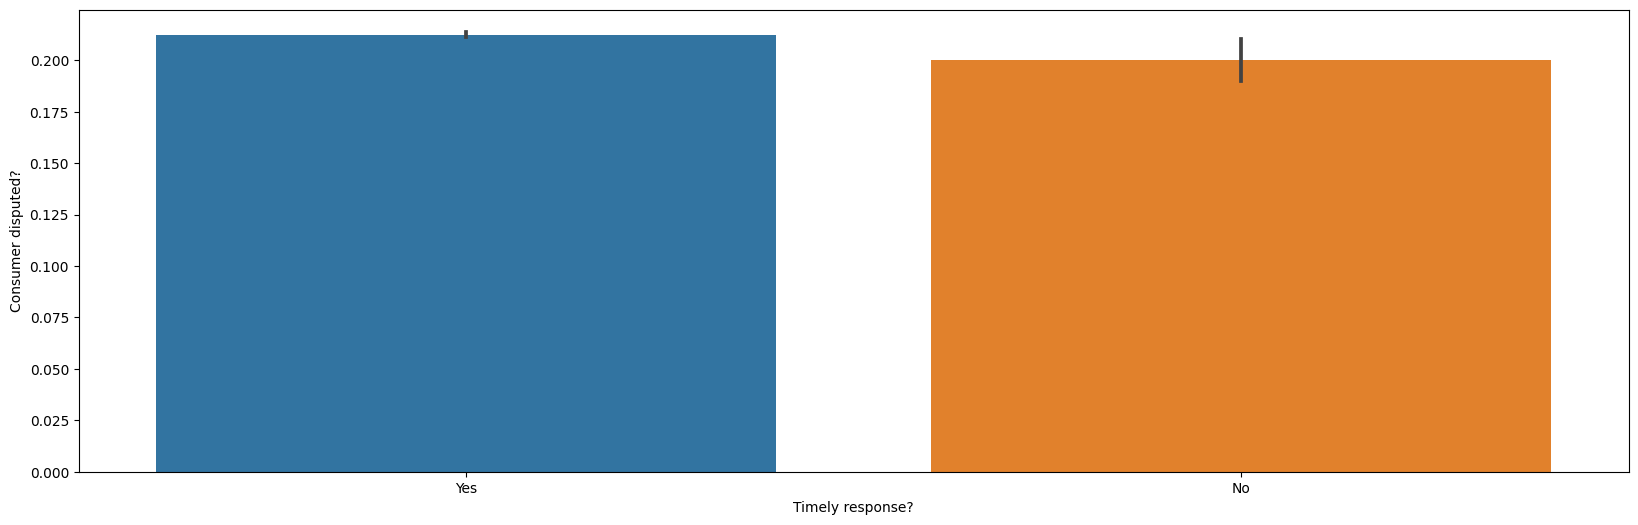

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.barplot(x = 'Timely response?',
            y = 'Consumer disputed?',
            data = df_tr)

<Axes: xlabel='Timely response?', ylabel='count'>

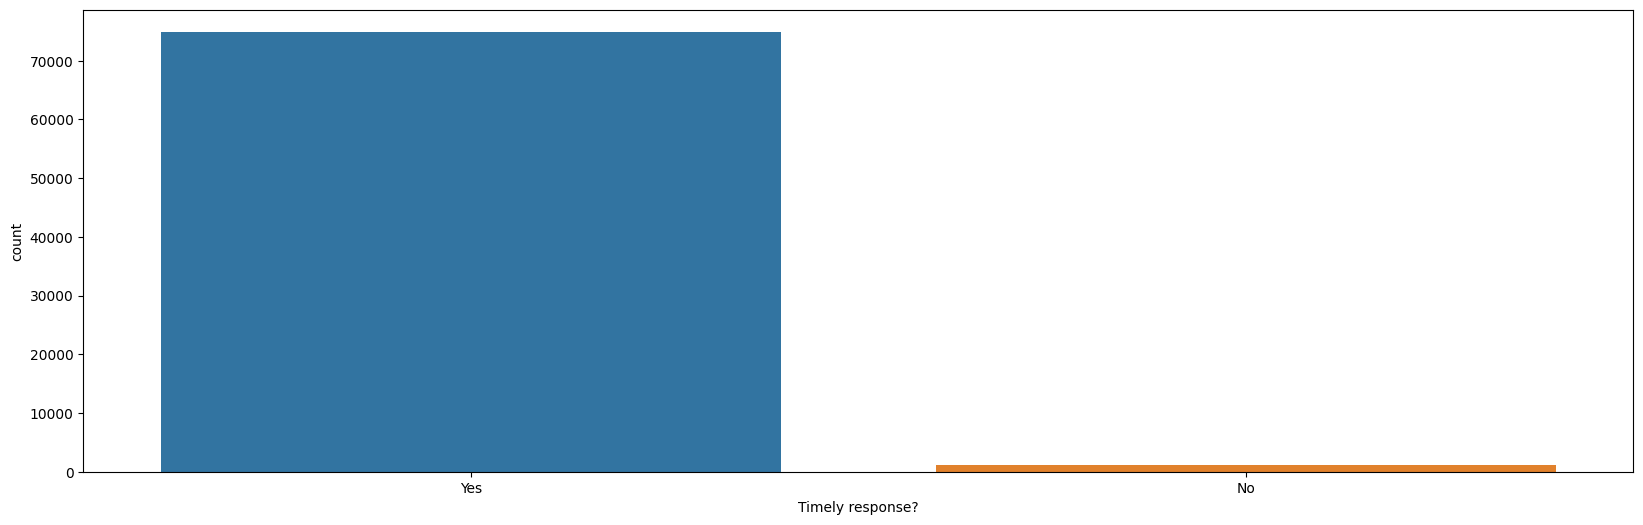

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['Timely response?'],data=df_tr)

<Axes: xlabel='Year', ylabel='Consumer disputed?'>

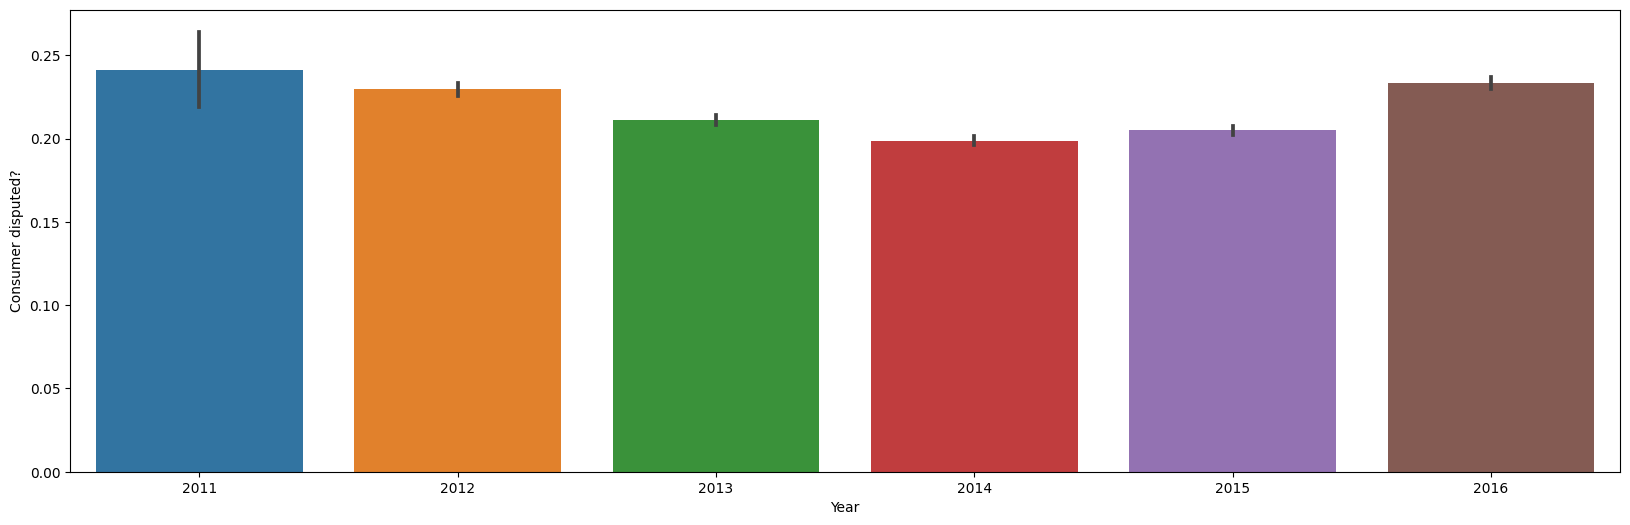

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))

sns.barplot(x = 'Year',
            y = 'Consumer disputed?',
            data = df_tr)

<Axes: xlabel='Year', ylabel='count'>

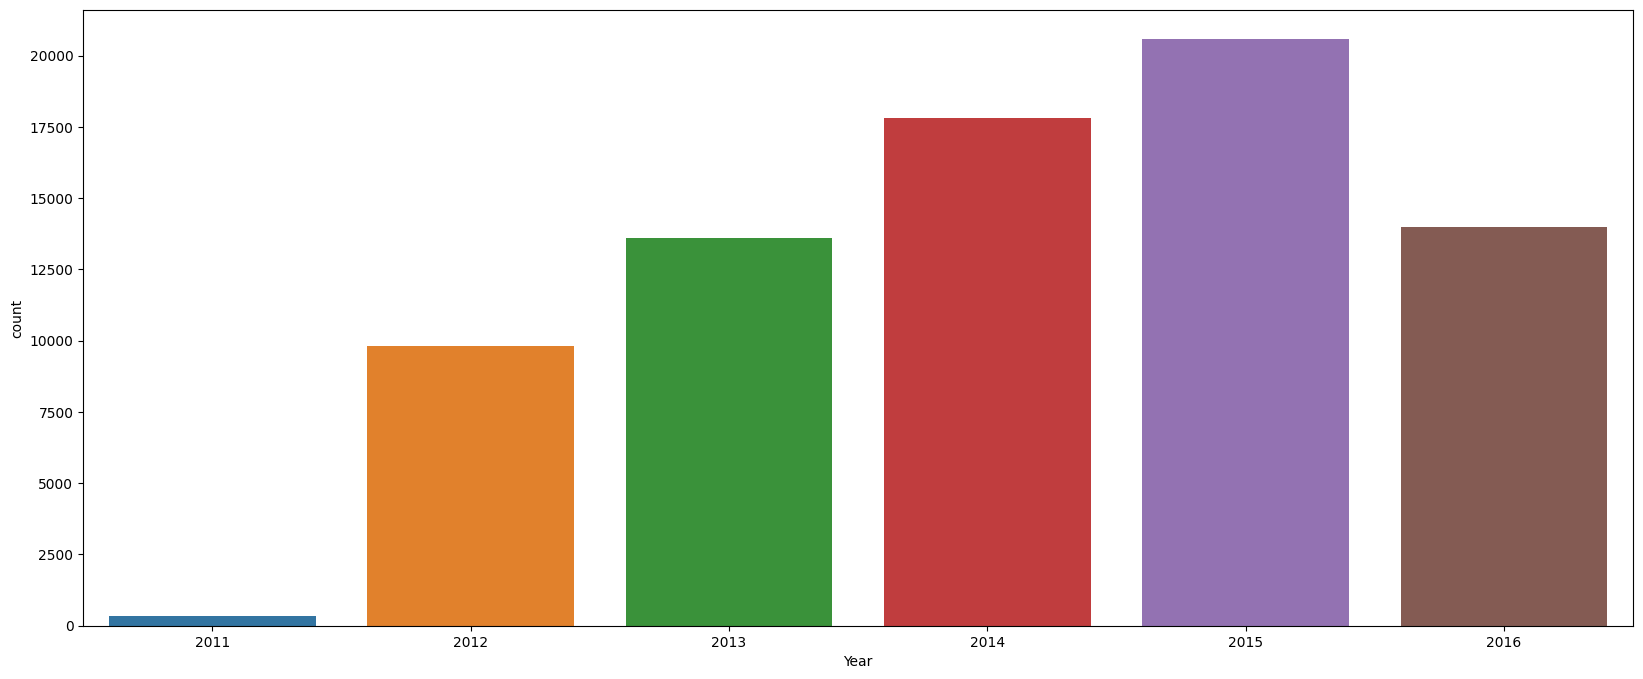

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
sns.countplot(x=df_tr[df_tr['Consumer disputed?'] == 1]['Year'],data=df_tr)

In [ ]:
df_tr['Days held']

0          0
1          0
2         14
3          1
4          0
          ..
358805    -1
358806     4
358807     0
358808     4
358809    22
Name: Days held, Length: 358810, dtype: int64

In [ ]:
df_tr['Days held'][df_tr['Days held']<0] = 0
df_tr['Days held']

<ipython-input-30-06d8f1784cf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['Days held'][df_tr['Days held']<0] = 0


0          0
1          0
2         14
3          1
4          0
          ..
358805     0
358806     4
358807     0
358808     4
358809    22
Name: Days held, Length: 358810, dtype: int64

In [ ]:
df_dummies = pd.get_dummies(df_tr[['Product','Submitted via' ,'Company response to consumer', 'Timely response?']])
df_tr = pd.concat([df_tr, df_dummies], axis=1)

In [ ]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.tokenize import word_tokenize

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import wordpunct_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_tr['Issue'].unique()

array(['Incorrect information on credit report',
       'Deposits and withdrawals', 'Other',
       'Disclosure verification of debt', 'APR or interest rate',
       'Loan modification,collection,foreclosure', 'Payoff process',
       "Cont'd attempts collect debt not owed",
       'Taking out the loan or lease',
       'Credit card protection / Debt protection',
       'Communication tactics', 'Problems caused by my funds being low',
       'Loan servicing, payments, escrow account',
       'Application, originator, mortgage broker', 'Billing disputes',
       'Identity theft / Fraud / Embezzlement',
       'Problems when you are unable to pay',
       'Account opening, closing, or management',
       'Taking/threatening an illegal action',
       'Unsolicited issuance of credit card',
       'Managing the loan or lease', 'Payment to acct not credited',
       'Settlement process and costs',
       'Improper contact or sharing of info',
       "Credit reporting company's investigation

In [ ]:
relevant_text_train = df_tr['Issue']
relevant_text_test = df_te['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [ ]:
df_tr['Issues_cleaned'] = clean_data_train
df_te['Issues_cleaned'] = clean_data_test
df_tr = df_tr.drop('Issue', axis = 1)
df_te = df_te.drop('Issue', axis = 1)

In [ ]:
df_tr.columns

Index(['Date received', 'Product', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Year', 'Month', 'Day', 'Days held', 'Week',
       'disputed_cons', 'Product_Bank account or service',
       'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Money transfers', 'Product_Mortgage',
       'Product_Other financial service', 'Product_Payday loan',
       'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
      

In [ ]:
# df['Date received'] = df['Date Received'].astype('|S')
y = pd.read_csv('/content/Consumer_Complaints_train.csv')
y = y.drop(y[['Complaint ID','Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue','Consumer complaint narrative', 'Company public response', 'Company','State', 'ZIP code', 'Tags', 'Consumer consent provided?','Submitted via', 'Date sent to company', 'Company response to consumer','Timely response?', 'Complaint ID']], axis = 1)
y['Consumer disputed?'] = np.where(y['Consumer disputed?'] == "No", 0, 1)

df_tr= df_tr.drop(df_tr[['Date received','Product','Submitted via' ,'Company response to consumer','Company', 'State', 'Year','Consumer disputed?', 'disputed_cons','Days held', 'Timely response?']], axis=1 )

# df_test = pd.read_csv('/content/Consumer_Complaints_test.csv')

In [ ]:
# df_tr=df_tr.drop

In [ ]:
y.shape

(358810, 1)

In [ ]:
df_tr

,Month,Day,Week,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes,Issues_cleaned
0,10,14,42,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,incorrect inform on credit report
1,4,26,17,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,deposit and withdraw
2,12,20,51,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,other
3,3,3,9,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,disclosur verif of debt
4,1,30,5,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,disclosur verif of debt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,4,14,16,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,incorrect inform on credit report
358806,3,14,11,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,loan modif collect foreclosur
358807,2,1,5,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,payoff process
358808,6,25,26,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,cont d attempt collect debt not owe


In [ ]:
df_tr.columns

Index(['Month', 'Day', 'Week', 'Product_Bank account or service',
       'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Money transfers', 'Product_Mortgage',
       'Product_Other financial service', 'Product_Payday loan',
       'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
       'Company response to consumer_Closed with relief',
       'Company response to consumer_Closed without relief',
       'Timely response?_No', 'Timely response?_Yes', 'Issues_cleaned'],
      dtype=

In [ ]:
null_percentage = df_te.isnull().sum()/df_te.shape[0]*100
col_to_drop = null_percentage[null_percentage>25].keys()
df_te = df_te.drop(col_to_drop, axis=1)
df_te.isnull().sum()/df_te.shape[0]*100

Date received                   0.000000
Product                         0.000000
Company                         0.000000
State                           0.782569
ZIP code                        0.783406
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Complaint ID                    0.000000
Issues_cleaned                  0.000000
dtype: float64

In [ ]:
df_te['Year'] = pd.DatetimeIndex(df_te['Date received']).year
df_te['Month'] = pd.DatetimeIndex(df_te['Date received']).month
df_te['Day'] = pd.DatetimeIndex(df_te['Date received']).day
df_te

,Date received,Product,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Issues_cleaned,Year,Month,Day
0,2015-01-17,Credit card,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,custom servic custom relat,2015,1,17
1,2016-06-22,Consumer Loan,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,payment to acct not credit,2016,6,22
2,2015-09-04,Credit card,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,credit line increas decreas,2015,9,4
3,2016-05-17,Consumer Loan,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,problem when you be unabl to pay,2016,5,17
4,2016-07-07,Debt collection,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,improp contact or share of info,2016,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,credit determin,2015,2,9
119602,2012-11-13,Credit card,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,balanc transfer,2012,11,13
119603,2012-05-15,Mortgage,Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,loan modif collect foreclosur,2012,5,15
119604,2015-06-07,Credit reporting,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,incorrect inform on credit report,2015,6,7


In [ ]:
df_dummies = pd.get_dummies(df_te[['Product','Submitted via' ,'Company response to consumer', 'Timely response?']])
df_te = pd.concat([df_te, df_dummies], axis=1)
df_te

,Date received,Product,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,2015-01-17,Credit card,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,...,0,1,0,0,1,0,0,0,0,1
1,2016-06-22,Consumer Loan,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,...,0,0,0,1,0,0,0,0,0,1
2,2015-09-04,Credit card,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,...,0,1,0,1,0,0,0,0,0,1
3,2016-05-17,Consumer Loan,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,...,0,1,0,0,0,1,0,0,0,1
4,2016-07-07,Debt collection,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,...,0,1,0,1,0,0,0,0,0,1
119602,2012-11-13,Credit card,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,...,0,1,0,1,0,0,0,0,0,1
119603,2012-05-15,Mortgage,Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,...,1,0,0,0,0,0,0,1,0,1
119604,2015-06-07,Credit reporting,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
df_te['Date received'] = pd.to_datetime(df_te['Date received'])
df_te['Week'] = df_te['Date received'].dt.week
df_te.columns


<ipython-input-46-b5748455d0bb>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_te['Week'] = df_te['Date received'].dt.week


Index(['Date received', 'Product', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Issues_cleaned', 'Year', 'Month',
       'Day', 'Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Money transfers',
       'Product_Mortgage', 'Product_Other financial service',
       'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
   

In [ ]:
df_te= df_te.drop(df_te[['Date received','Product','Submitted via' ,'Company response to consumer','Company', 'State', 'Year', 'Timely response?']], axis=1 )


In [ ]:
df_te= df_te.drop(df_te[['ZIP code', 'Date sent to company', 'Complaint ID']], axis=1 )


In [ ]:
df_tr.shape

(358810, 30)

In [ ]:
df_te.shape

(119606, 30)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_tr['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_te['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [ ]:
df_tr = df_tr.drop('Issues_cleaned', axis = 1)
df_te = df_te.drop('Issues_cleaned', axis = 1)
df_tr = pd.concat([df_tr, issues_train], axis = 1)
df_te = pd.concat([df_te, issues_test], axis = 1)
Feature168 = [0] * 119606
df_te['Feature168'] = Feature168

In [ ]:
df_tr.shape

(358810, 197)

In [ ]:
df_te.shape

(119606, 197)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss = StandardScaler()
X= pd.DataFrame(ss.fit_transform(df_tr), columns = df_tr.columns)
# y= pd.DataFrame(ss.fit_transform(y), columns = y.columns)

pca = PCA(n_components=53, whiten=True)
X=pca.fit_transform(X)
# y=pca.fit_transform(y)
pca.explained_variance_ratio_

array([0.03501318, 0.03342091, 0.03144012, 0.02669018, 0.02463706,
       0.02360423, 0.02184513, 0.02165497, 0.02113806, 0.02058637,
       0.02010587, 0.01987353, 0.01934785, 0.01810427, 0.01715896,
       0.016315  , 0.01580389, 0.01567217, 0.0154009 , 0.01527267,
       0.01502563, 0.01498092, 0.01492929, 0.0145037 , 0.01430121,
       0.01383992, 0.0137824 , 0.01342837, 0.01269074, 0.01203025,
       0.01176102, 0.01151708, 0.01104005, 0.01072358, 0.01060227,
       0.01049518, 0.01045838, 0.01038544, 0.01029999, 0.01021494,
       0.01016652, 0.01014918, 0.01012651, 0.00987158, 0.00963838,
       0.00956479, 0.00914052, 0.00874299, 0.00842897, 0.00807655,
       0.00787452, 0.00762723, 0.00751049])

In [ ]:
X.shape

(358810, 53)

In [ ]:
y

,Consumer disputed?
0,0
1,1
2,0
3,0
4,1
...,...
358805,0
358806,0
358807,1
358808,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
y = lab.fit_transform(y)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  stratify=y, random_state = 100, shuffle=True)

logr = LogisticRegression(class_weight = 'balanced')
logr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [ ]:
X_train.shape

(287048, 53)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pred = logr.predict(X_test)
score = accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66     56528
           1       0.26      0.59      0.36     15234

    accuracy                           0.56     71762
   macro avg       0.55      0.57      0.51     71762
weighted avg       0.71      0.56      0.60     71762



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dect = DecisionTreeClassifier()
  
    # Performing training
dect.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred = dect.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.79      0.93      0.86     56528
           1       0.28      0.10      0.15     15234

    accuracy                           0.75     71762
   macro avg       0.54      0.52      0.50     71762
weighted avg       0.68      0.75      0.71     71762



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100) 
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred = rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     56528
           1       0.29      0.11      0.16     15234

    accuracy                           0.76     71762
   macro avg       0.54      0.52      0.51     71762
weighted avg       0.69      0.76      0.71     71762



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, random_state=32)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=32)

In [ ]:
predr = abc.predict(X_test)
print(classification_report(y_test,predr))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56528
           1       0.00      0.00      0.00     15234

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier( learning_rate=0.1, n_estimators=50, random_state = 32)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=32)

In [ ]:
predg = gbc.predict(X_test)
print(classification_report(y_test,predg))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56528
           1       0.00      0.00      0.00     15234

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predk = knc.predict(X_test)
print(classification_report(y_test,predk))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     56528
           1       0.29      0.12      0.17     15234

    accuracy                           0.75     71762
   macro avg       0.54      0.52      0.51     71762
weighted avg       0.69      0.75      0.71     71762



In [ ]:
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV

xgbc = xgb.XGBClassifier()
# xgbcc=CalibratedClassifierCV(xgbc, method='isotonic')
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predxgb = xgbc.predict(X_test)
print(classification_report(y_test,predxgb))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56528
           1       0.40      0.00      0.01     15234

    accuracy                           0.79     71762
   macro avg       0.59      0.50      0.44     71762
weighted avg       0.70      0.79      0.70     71762



In [ ]:
test_data= pd.DataFrame(ss.fit_transform(df_te), columns = df_te.columns)
test_data=pca.fit_transform(test_data)
test_data.shape

(119606, 53)

In [ ]:
tpred1 = xgbc.predict(test_data)
tpred2 = rfc.predict(test_data)
accuracy_score(tpred1,tpred2)

0.8306523084126214

In [ ]:
print(classification_report(tpred1,tpred2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91    118546
           1       0.03      0.58      0.06      1060

    accuracy                           0.83    119606
   macro avg       0.51      0.71      0.48    119606
weighted avg       0.99      0.83      0.90    119606



In [ ]:
new_test = pd.read_csv('/content/Consumer_Complaints_test.csv')

In [ ]:
new_test['Consumer disputed? by XGBC'] = pd.DataFrame(tpred1, columns =['Consumer disputed? by XGBC'])

In [ ]:
new_test['Consumer disputed? by RFC'] = pd.DataFrame(tpred2, columns =['Consumer disputed? by RFC'])
new_test

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer disputed? by XGBC,Consumer disputed? by RFC
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133,0,0
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989,0,0
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090,0,1
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,0,0
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,NaN,Credit determination,NaN,NaN,NaN,Citibank,IL,60803,NaN,NaN,Web,2015-02-09,Closed with explanation,Yes,1230729,0,0
119602,2012-11-13,Credit card,NaN,Balance transfer,NaN,NaN,NaN,Capital One,KS,67114,NaN,NaN,Web,2012-11-14,Closed with explanation,Yes,189749,0,1
119603,2012-05-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Referral,2012-05-15,Closed without relief,Yes,78574,0,0
119604,2015-06-07,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"In XX/XX/XXXX, a Collection firm by the name o...",Company chooses not to provide a public response,Experian,OH,436XX,NaN,Consent provided,Web,2015-06-07,Closed with explanation,Yes,1409765,0,0


In [ ]:
new_test.to_csv('/content/Consumer_Complaints_test_result.csv')